In [1]:
!pip install textblob
!pip install vaderSentiment
!pip install watson_developer_cloud
!pip install ibm_watson

     |████████████████████████████████| 125 kB 8.8 MB/s 
     |████████████████████████████████| 248 kB 6.9 MB/s 
     |████████████████████████████████| 198 kB 63.6 MB/s 
  Created wheel for watson-developer-cloud: filename=watson_developer_cloud-2.10.1-py3-none-any.whl size=252821 sha256=27570ecf1cd3a07bb9ed8b1de0a0aa9ab737ece46218606ae852d383fd29d99f
  Stored in directory: /root/.cache/pip/wheels/45/68/30/690e59503415433f536c00ef66656a1aa045e927a2ad6ab7fc
Successfully built watson-developer-cloud
     |████████████████████████████████| 407 kB 6.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 44 kB 3.0 MB/s 
     |████████████████████████████████| 68 kB 6.9 MB/s 
  Created wheel for ibm-watson: filename=ibm_watson-5.2.2-py3-none-any.whl size=403388 sha256=3700e06f49ff5460401489b9bceefa0866562d111154494977d9f32ef1232775
  Stored in directory: /root/.cache/pip/w

### A. TEXTLOB

Prueba con la librería TextLob y varios tweets o textos inventados. Esta librería admite str y nos devuelve un valor entre -1 y 1 indicando el grado de positividad del tweet.

In [3]:
from textblob import TextBlob


def get_textBlob_score(sent):
    # This polarity score is between -1 to 1
    polarity = TextBlob(sent).sentiment.polarity
    return polarity


print(get_textBlob_score("This thing is super cool!"))
print(get_textBlob_score("This thing is super cool!!"))
print(get_textBlob_score("This thing is super cool!!!"))

0.38541666666666663
0.44010416666666663
0.5084635416666666


### B. VADER

Prueba con la librería Vader y varios tweets o textos inventados. Esta librería admite str y nos devuelve cuadro valores todos entre 0 y 1 salvo el compuesto, que indica el grado final de posivitividad del tweet en la escala de -1 a 1: 
- Porcentaje de negatividad en el tweet.
- Porcentaje de neutralidad.
- Porcentaje de positividad.
- Compound: Mezclando los tres valores anteriores, da un grado de positividad del tweet en la escala de -1 a 1.

Una de las ventajas de esta librería es que también analiza el sentimiento de los emoji.

In [ ]:
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()


def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))


sentiment_analyzer_scores("This thing is not that bad")

# El tema de las exclamaciones influye:
sentiment_analyzer_scores("This thing is super cool!")
sentiment_analyzer_scores("This thing is super cool!!")
sentiment_analyzer_scores("This thing is super cool!!!")

# Más pruebas
sentiment_analyzer_scores("Food here is good.")
sentiment_analyzer_scores("Food here is horrible.")
sentiment_analyzer_scores("Food here is extremely good.")

# Frases compuestas
sentiment_analyzer_scores("Food here is extremely good but service is horrible.")

# Emotis
print(sentiment_analyzer_scores('I was 😄 yesterday, but today is a horrible day'))
print(sentiment_analyzer_scores('😊'))
print(sentiment_analyzer_scores('😥'))
print(sentiment_analyzer_scores('☹️'))
print(sentiment_analyzer_scores("Make sure you :) or :D today!"))

# Slangs
print(sentiment_analyzer_scores("Today SUX!"))
print(sentiment_analyzer_scores("Today only kinda sux! But I'll get by, lol"))

This thing is not that bad-------------- {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.431}
This thing is super cool!--------------- {'neg': 0.0, 'neu': 0.316, 'pos': 0.684, 'compound': 0.7574}
This thing is super cool!!-------------- {'neg': 0.0, 'neu': 0.307, 'pos': 0.693, 'compound': 0.7772}
This thing is super cool!!!------------- {'neg': 0.0, 'neu': 0.298, 'pos': 0.702, 'compound': 0.795}
Food here is good.---------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
Food here is horrible.------------------ {'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}
Food here is extremely good.------------ {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}
Food here is extremely good but service is horrible. {'neg': 0.343, 'neu': 0.506, 'pos': 0.151, 'compound': -0.5652}
I was 😄 yesterday, but today is a horrible day {'neg': 0.244, 'neu': 0.564, 'pos': 0.192, 'compound': -0.4588}
None
😊--------------------------------------- {'neg': 0.0, 

### 3. IBM WATSON

Prueba con la librería IBM y varios tweets o textos inventados. Esta librería admite str y nos devuelve un valor entre -1 y 1 indicando el grado de positividad del tweet.

Con esta librería hay que tener cuidado porque si el texto no está en el lenguaje indicado (Inglés en este cas) no funciona y lanza un ApiException.

Lo bueno de esta librería es que también nos facilita una variable que sirve para el topic modelling.

In [31]:
pip install --upgrade "ibm-watson>=5.1.0"

In [16]:
nlu_apikey = "-AqVH2-6FPhc1fTcVHf9WHQXok1CCHul044GKRgQMi_a"
nlu_url = "https://api.au-syd.natural-language-understanding.watson.cloud.ibm.com/instances/07732151-0ad7-45f7-af60-85562116af50"

In [17]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, CategoriesOptions, ConceptsOptions, EmotionOptions, EntitiesOptions, KeywordsOptions, RelationsOptions, SentimentOptions

authenticator = IAMAuthenticator(nlu_apikey)
natural_language_undestanding = NaturalLanguageUnderstandingV1(
    version = '2020-08-01', 
    authenticator = authenticator
)
natural_language_undestanding.set_service_url(nlu_url)

In [22]:
# No me funciona
texto = "I am very happy"
response = natural_language_undestanding.analyze(text=texto, features=Features(keywords=KeywordsOptions(), 
                                                              entities=EntitiesOptions(), 
                                                              categories=CategoriesOptions(),
                                                              emotion=EmotionOptions(),
                                                              sentiment=SentimentOptions())).get_result()


# print(json.dumps(response, indent=2))
# print(response)
# print("- Compound:", response['sentiment']['document']['score']) # compound
# print("- Label:",response['sentiment']['document']['label']) # label
# # print("- keywords: ", response['keywords'][0]['text'],",",response['keywords'][1]['text'])
# print("- entities: ", response['entities'] )
# print("- emotion:", response['emotion'])
# print("- Categories: ", response['categories']) # TOPIC MODELLING

ApiException: ignored

### FINAL

Creamos tres funciones que devuelven el sentimiento en base a cada una de las librerías descritas anteriormente. Después creamos una función que calcula la media ponderada de las tres variables (POR HACER) y definimos las nuevas variables que incorporaremos al df. 

De esta forma, obtendremos un sentimiento del tweet más preciso (a traves de la media).

In [23]:
# Funcion de IBM WATSON
def sentiment_ibm(sentence):
  try: 
    aux = natural_language_undestanding.analyze(text=sentence, features=Features(keywords=KeywordsOptions(), 
                                                                entities=EntitiesOptions(), 
                                                                categories=CategoriesOptions(),
                                                                emotion=EmotionOptions(),
                                                                sentiment=SentimentOptions())).get_result()['sentiment']['document']['score']
    return float(aux)
  
  except:
    return 9999

In [24]:
# Función de TEXTBLOB
def sentiment_textblob(sentence):
  return (get_textBlob_score(sentence))

In [25]:
# Función de VADER
def sentiment_vader(sentence):
  return (float(analyser.polarity_scores(sentence)['compound']))

In [26]:
# Función que hace la media ponderada
def media(num1,num2,num3):
  
  a = 1/3
  b = 1/3
  c = 1/3

  m = a*float(num1) + b*float(num2) + c*float(num3)

  return m

## Lectura del dataset

In [29]:
# Lectura del dataset
df = pd.read_excel("./extraccion_uber_completa_SIN_DUPLICADOS.xlsx")

## Generación de variable output con librería VADER,  TEXTBLOB e IBM


In [ ]:
df['possitivity_textblob'] = df['text'].apply(lambda x: sentiment_textblob(x))
df['possitivity_vader'] = df['text'].apply(lambda x: sentiment_vader(x))
df['possitivity_ibm'] = df['text'].apply(lambda x: sentiment_ibm(x))

In [ ]:
# Guardamos el fichero con las variables creadas
df.to_csv('data-unsupervised-sentiment-20210819.csv')

In [4]:
# Abrimos el fichero anterior de la carpeta
df = pd.read_csv("../Procesamiento_Datos/data-unsupervised-sentiment-20210819.csv")

In [75]:
df[["text","possitivity_textblob", "possitivity_vader", 'possitivity_ibm']]

,text,possitivity_textblob,possitivity_vader,possitivity_ibm
0,@Uber_Support hi guys why all my trips this we...,0.000000,0.0000,-0.912398
1,So are we getting Uber eats league 1 or not @S...,0.000000,0.0000,0.000000
2,"@footballdaily 2-3 years of Messi, a bit of ca...",-0.333333,0.5859,-0.807459
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,0.455000,0.4754,0.863584
4,"Uber's Gopuff partnership, Drizly deal being p...",0.000000,0.0000,-0.788377
...,...,...,...,...
7922,"Over 3,800 rides in over 3.5 years one blown t...",0.000000,0.4898,-0.911314
7923,@CoolABADev obviously i will want Messi to suc...,0.114286,-0.0333,-0.759793
7924,"@catekitchen Shit, that’s absolutely a crap si...",-0.250000,-0.7086,-0.988080
7925,Simply don’t take a Uber then dumb ass https:/...,-0.187500,-0.8096,-0.971243


In [76]:
import numpy as np
variables = ['possitivity_textblob','possitivity_vader','possitivity_ibm']
df['sentiment_mean'] = df[variables].apply(np.mean, axis=1)
df[["text","sentiment_mean", "possitivity_textblob", "possitivity_vader", 'possitivity_ibm']]

,text,sentiment_mean,possitivity_textblob,possitivity_vader,possitivity_ibm
0,@Uber_Support hi guys why all my trips this we...,-0.304133,0.000000,0.0000,-0.912398
1,So are we getting Uber eats league 1 or not @S...,0.000000,0.000000,0.0000,0.000000
2,"@footballdaily 2-3 years of Messi, a bit of ca...",-0.184964,-0.333333,0.5859,-0.807459
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,0.597995,0.455000,0.4754,0.863584
4,"Uber's Gopuff partnership, Drizly deal being p...",-0.262792,0.000000,0.0000,-0.788377
...,...,...,...,...,...
7922,"Over 3,800 rides in over 3.5 years one blown t...",-0.140505,0.000000,0.4898,-0.911314
7923,@CoolABADev obviously i will want Messi to suc...,-0.226269,0.114286,-0.0333,-0.759793
7924,"@catekitchen Shit, that’s absolutely a crap si...",-0.648893,-0.250000,-0.7086,-0.988080
7925,Simply don’t take a Uber then dumb ass https:/...,-0.656114,-0.187500,-0.8096,-0.971243


### Definición de la variable objetivo categórica

Actualmente ya tenemos definida la variable objetivo.

'sentiment_media' es una variable que especifica el grado de positividad de cada tweet en una escala de -1 a 1 pero, para que sea más claro, estandarizaremos la variable a la escala de 0 a 1. De esta forma podemos definir el grado de positividad como un porcentaje, es decir, el tweet es un X% positivo.

Como nos interesa que la variable objetivo sea categórica, dividiremos en 5 categorias la estandarización anterior, de forma que el tweet se considere:
- Muy negativo: 0 - 0.2
- Negativo: 0.2 - 0.4
- Neutro: 0.4 - 0.6
- Positivo: 0.6 - 0.8
- Muy positivo: 0.8 - 1

Tomando como intervalo cerrado el mayor valor de cada rango, salvo en la primera categoría, que también se incluirá el 0.

In [71]:
min = -1
max = 1
def scaler(numero):
  result = (numero - min) / (max - min)
  return result

In [77]:
df['sentiment_norm'] = df['sentiment_mean'].apply(lambda x: scaler(x))
df[["text",'sentiment_norm',"sentiment_mean", "possitivity_textblob", "possitivity_vader", 'possitivity_ibm']]

,text,sentiment_norm,sentiment_mean,possitivity_textblob,possitivity_vader,possitivity_ibm
0,@Uber_Support hi guys why all my trips this we...,0.347934,-0.304133,0.000000,0.0000,-0.912398
1,So are we getting Uber eats league 1 or not @S...,0.500000,0.000000,0.000000,0.0000,0.000000
2,"@footballdaily 2-3 years of Messi, a bit of ca...",0.407518,-0.184964,-0.333333,0.5859,-0.807459
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,0.798997,0.597995,0.455000,0.4754,0.863584
4,"Uber's Gopuff partnership, Drizly deal being p...",0.368604,-0.262792,0.000000,0.0000,-0.788377
...,...,...,...,...,...,...
7922,"Over 3,800 rides in over 3.5 years one blown t...",0.429748,-0.140505,0.000000,0.4898,-0.911314
7923,@CoolABADev obviously i will want Messi to suc...,0.386865,-0.226269,0.114286,-0.0333,-0.759793
7924,"@catekitchen Shit, that’s absolutely a crap si...",0.175553,-0.648893,-0.250000,-0.7086,-0.988080
7925,Simply don’t take a Uber then dumb ass https:/...,0.171943,-0.656114,-0.187500,-0.8096,-0.971243


### Variable categórica

In [80]:
# Definimos bins 
# Primer valor de los rangos -> 0
# Valor final de cada rango -> 0.2, 0.4, 0.6, 0.8 y 1
bins = [0, .2, .4, .6, .8, 1.]

# Definimos los nombres para cada categoría
names = ["Muy negativo", "Negativo", "Neutro", "Positivo", "Muy positivo"]

# Creamos la variable objetivo categórica
df['sentiment'] = pd.cut(df['sentiment_norm'], bins, labels = names)

In [81]:
# Mostramos los sentimientos obtenidos
df[["text",'sentiment','sentiment_norm',"sentiment_mean", "possitivity_textblob", "possitivity_vader", 'possitivity_ibm']]

,text,sentiment,sentiment_norm,sentiment_mean,possitivity_textblob,possitivity_vader,possitivity_ibm
0,@Uber_Support hi guys why all my trips this we...,Negativo,0.347934,-0.304133,0.000000,0.0000,-0.912398
1,So are we getting Uber eats league 1 or not @S...,Neutro,0.500000,0.000000,0.000000,0.0000,0.000000
2,"@footballdaily 2-3 years of Messi, a bit of ca...",Neutro,0.407518,-0.184964,-0.333333,0.5859,-0.807459
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,Positivo,0.798997,0.597995,0.455000,0.4754,0.863584
4,"Uber's Gopuff partnership, Drizly deal being p...",Negativo,0.368604,-0.262792,0.000000,0.0000,-0.788377
...,...,...,...,...,...,...,...
7922,"Over 3,800 rides in over 3.5 years one blown t...",Neutro,0.429748,-0.140505,0.000000,0.4898,-0.911314
7923,@CoolABADev obviously i will want Messi to suc...,Negativo,0.386865,-0.226269,0.114286,-0.0333,-0.759793
7924,"@catekitchen Shit, that’s absolutely a crap si...",Muy negativo,0.175553,-0.648893,-0.250000,-0.7086,-0.988080
7925,Simply don’t take a Uber then dumb ass https:/...,Muy negativo,0.171943,-0.656114,-0.187500,-0.8096,-0.971243


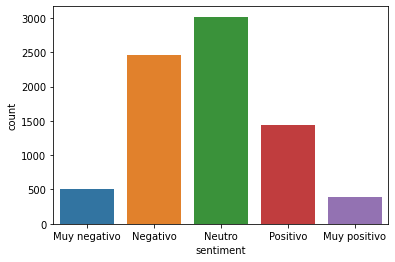

In [82]:
# Representamos con seaborn la variable objetivo para ver las categorías
import seaborn as sns

categorias = sns.countplot(x="sentiment", data=df)